<center><h1> Projeto de Ciência de Dados - Análise e Previsão de Problemas Cardíacos</h1><center>

## Insper Instituto de Ensino e Pesquisa
------------------------------------------------

<center><h5> Gabriel Hermida, Lucas Tachdjian e Pietro Bauducco<h5><center>

## Introdução
<div id="introdução"><div>
O avanço da sociedade tem sido impulsionado pelas rápidas transformações tecnológicas. Na área da medicina, esse progresso extraordinário tem possibilitado a descoberta de medidas preventivas, resultando em um aumento significativo da expectativa de vida. No entanto, mesmo diante desses avanços, ainda enfrentamos desafios relacionados a diversas doenças que afetam um número expressivo de pessoas ao redor do mundo. Isso pode ser atribuído tanto à falta de acesso a tecnologias médicas quanto à escassez de informações adequadas.

Dentre as principais causas de mortalidade global, destacam-se as doenças cardiovasculares, cuja incidência está associada a fatores comportamentais e culturais, tais como sedentarismo, tabagismo, alimentação inadequada, entre outros. Esses hábitos contribuem para a manutenção de níveis elevados de pressão arterial, glicemia e colesterol, potencializando o risco de desenvolvimento dessas enfermidades.

Nesse contexto, o objetivo deste trabalho é identificar o modelo classificatório mais adequado para prever, por meio de análise de dados, a suscetibilidade do paciente em relação a um ataque cardíaco. Ao explorar diferentes abordagens de classificação e utilizar bases de dados relevantes, buscamos fornecer informações valiosas que auxiliem na prevenção e no gerenciamento precoce dessas condições de saúde.

## Importando as bibiliotecas que usaremos:

In [112]:
from scipy import stats
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, precision_score, recall_score, f1_score, roc_curve, plot_confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
from sklearn import svm

## Base de Dados

Este é um conjunto de dados multivariado. Composto por 9 atributos sendo eles: idade, sexo, tipo de dor torácica, pressão arterial em repouso, colesterol sérico, resultados eletrocardiográficos em repouso, frequência cardíaca máxima atingida, angina induzida pelo exercício e teste de glicemia em jejum.

### Legenda:

**age** : Idade do paciente

**sex** : Sexo do paciente (1 = homens, 0 = mulheres)

**exng** : Angina induzida pelo exercício (1 = yes; 0 = no)

**cp** : Tipo de dor no Peito

    Valor 0: Angina Estável
    Valor 1: Angina Instável
    Valor 2: Dor não anginosa (dor atípica, pode ser uma dor não relacionada ao coração)
    Valor 3: Assintomático

**trtbps** : Pressão sanguínea em descanso (em mm Hg)

**chol** : Colesterol em mg/dl aferido através do sensor de IMC

**fbs** (teste de glicemia rápido) :
 
    0 = menor que 120 mg/dl (exame normal)
    1 = mais que 120mg/dl (exame alterado)

**oldpeak** : depressão de ST induzida pelo exercício em relação ao repouso 'ST' refere-se a posições no gráfico do eletrocardiograma. 

**slp**: a inclinação do segmento ST do exercício de pico — 0: inclinação descendente; 1: plano; 2: subida
0: descida

**restecg** (resultados dos exames eletrocardiográficos) :  

    Valor 0: normal
    Valor 1: tendo anormalidade da onda ST-T (Inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)
    Valor 2: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes

**thalachh** : frequência cardíaca máxima atingida

**thal** (um distúrbio do sangue chamado talassemia): 

    Valor 0: NULL (retirado do conjunto de dados anteriormente)
    Valor 1: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)
    Valor 2: fluxo sanguíneo normal
    Valor 3: defeito reversível (observa-se um fluxo sanguíneo, mas não é normal)

**output** (target) : 

    0: menos chance de ter um ataque cardíaco 
    1: mais chance de ter um ataque cardíaco

In [113]:
db = pd.read_csv('db1_heart.csv')

In [114]:
db.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
print(f'A base de dados tem {db.shape[0]} instâncias com {db.shape[1]} features')

A base de dados tem 303 instâncias com 14 features


In [116]:
db.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<div id='objetivos' ><div>

## Objetivos

O objetivo deste trabalho é identificar o modelo classificatório mais adequado para prever, utilizando uma base de dados, o nível de suscetibilidade de um paciente em relação a um ataque cardíaco. Por meio de uma análise comparativa de diferentes modelos de classificação, buscamos determinar qual deles apresenta maior precisão na previsão desse importante desfecho de saúde.

Ao explorar a base de dados disponível, empregaremos técnicas de aprendizado de máquina e algoritmos de classificação para extrair insights relevantes e estabelecer um modelo preditivo confiável. Com isso, esperamos contribuir para a identificação precoce de indivíduos com maior risco de desenvolver um ataque cardíaco, permitindo a implementação de intervenções preventivas efetivas e o direcionamento de recursos de saúde de forma mais precisa.

Ao final do estudo, será possível determinar qual modelo classificatório apresenta melhores resultados na tarefa de prever a suscetibilidade de um paciente a um ataque cardíaco, fornecendo uma base sólida para futuras pesquisas e aplicações clínicas no campo da cardiologia.

## Análise Exploratória dos Dados
#### Relação entre homens e mulheres na Database

In [117]:
# Criando uma database nova para ficar mais simples de realizar o gráfico da feature 'sexo'
dbhm = db.copy()
def chng(sex):
    if sex == 0:
        return 'mulher'
    else:
        return 'homem'
dbhm['sex'] = dbhm['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Com Doença Cardíaca'
    else:
        return 'Sem Doença Cardíaca'

dbhm['output'] = db['output'].apply(chng2)

Text(0.5, 0, 'Sexo')

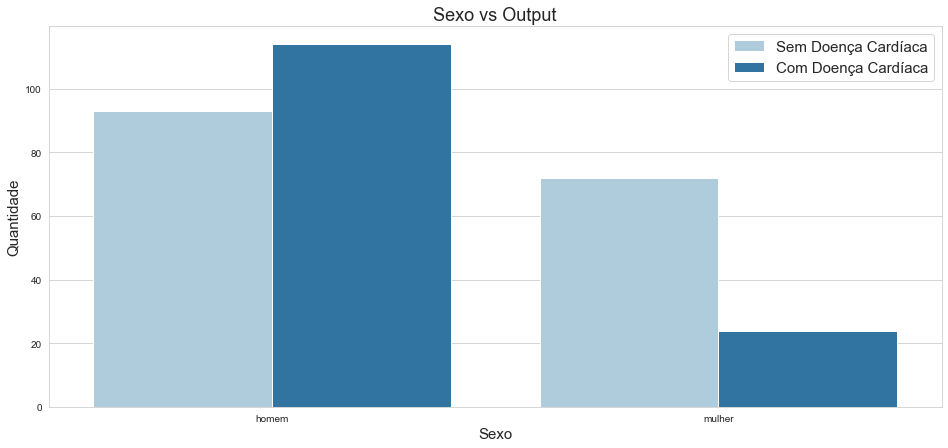

In [118]:
# Gráfico do sexo vs output 
plt.figure(figsize=(16,7))
sns.set_style('whitegrid')
sns.set_palette('Paired')
sns.countplot(data= dbhm, x='sex',hue='output')
plt.legend(fontsize=15)
plt.title('Sexo vs Output', fontsize=18)
plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Sexo', fontsize=15)


In [119]:
# Existem mais homens no dataset.

In [120]:
# Probabilidade das pessoas do sexo X terem um ataque cardíaco:

output1 = db[db['output'] == 1]
output0 = db[db['output'] == 0]

sex = ['homens', 'mulheres']
sex_count = db['sex'].value_counts(sort=False) # contagem da coluna 'sexo'
sex_count_o1 = output1['sex'].value_counts(sort=False) #contagem da coluna 'sexo' nos outputs == 1

qtd_h = sex_count[0]
qtd_h_o1 = sex_count_o1[0]

qtd_m = sex_count[1]
qtd_m_o1 = sex_count_o1[1]

def probabilidade(l1, l2):
    
    if l1>=l2:
        x = l2/l1
    else:
        x = l1/l2
        
    return x
    
prob_h_atq = probabilidade(qtd_h, qtd_h_o1)
prob_m_atq = probabilidade(qtd_m, qtd_m_o1)

print(f'Probabilidade dos homens da Database terem um ataque cardíaco é de {prob_h_atq:.2f}\nProbabilidade das mulheres da Database terem um ataque cardíaco é de {prob_m_atq:.2f}')

Probabilidade dos homens da Database terem um ataque cardíaco é de 0.75
Probabilidade das mulheres da Database terem um ataque cardíaco é de 0.45


Conforme com os gráficos plotados e as probabilidades calculadas, existem mais homens na base de dados e, a probabilidade de um homem ter um ataque cardíaco (aproximadamente 75%) é muito maior do que a de uma mulher ter um ataque cardíaco (aproximadamente 45%).


### Relação entre idades na Database

In [121]:
# Função que separa as faixas de idade: 

def define_ages(age_list):

    child = []
    teen = []
    young_ad = []
    adult = []
    elder = []

    ages = [child,teen,young_ad,adult,elder]

    i = 0
    while i < len(age_list):
        if age_list[i] >= 65:
            elder.append(age_list[i])

        elif 21 <= age_list[i] < 65:
            adult.append(age_list[i])

        elif 18 <= age_list[i] < 21:
            young_ad.append(age_list[i])

        elif 12 <= age_list[i] < 18:
            teen.append(age_list[i])
            
        else:
            child.append(age_list[i])
        
        i += 1
    
    return ages 
    

In [122]:
# Definindo idades com a função feita acima:

idades = define_ages(db['age'])

crianca = idades[0]
adolescente = idades[1]
jovem_ad = idades[2]
adulto = idades[3]
idoso = idades[4]

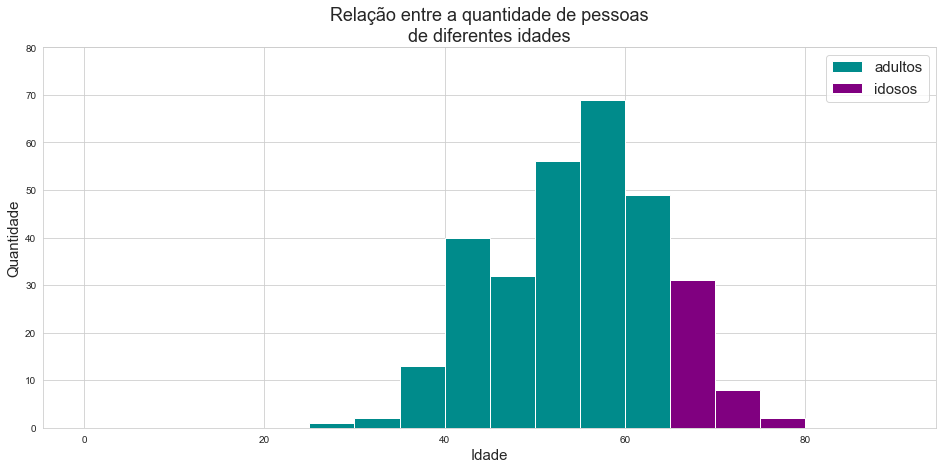

Número total de adultos: 262. 
Número total de idosos: 41


In [123]:
# Relação entre a quantia de pessoas de cada faixa etária
faixa = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

plt.figure(figsize=(16,7))
plt.hist(crianca, bins=faixa, color='green', edgecolor='white')
plt.hist(adolescente, bins=faixa, color='red', edgecolor='white')
plt.hist(jovem_ad, bins=faixa, color='pink', edgecolor='white')
plt.hist(adulto, bins=faixa, color='darkcyan', edgecolor='white', label='adultos')
plt.hist(idoso, bins=faixa, color='purple', edgecolor='white', label='idosos')
plt.legend(fontsize=15)
plt.title('Relação entre a quantidade de pessoas\nde diferentes idades', fontsize=18)
plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Idade', fontsize=15)
plt.ylim([0, 80])

plt.show()

print(f'Número total de adultos: {len(adulto)}. \nNúmero total de idosos: {len(idoso)}')

In [124]:
# Existem mais adultos no dataset.

In [125]:
# Definindo as pessoas de diferentes idades que tiveram problemas cardíacos:
idades_o1 = define_ages(output1['age'])

crianca_o1 = idades_o1[0]
adolescente_o1 = idades_o1[1]
jovem_ad_o1 = idades_o1[2]
adulto_o1 = idades_o1[3]
idoso_o1 = idades_o1[4]

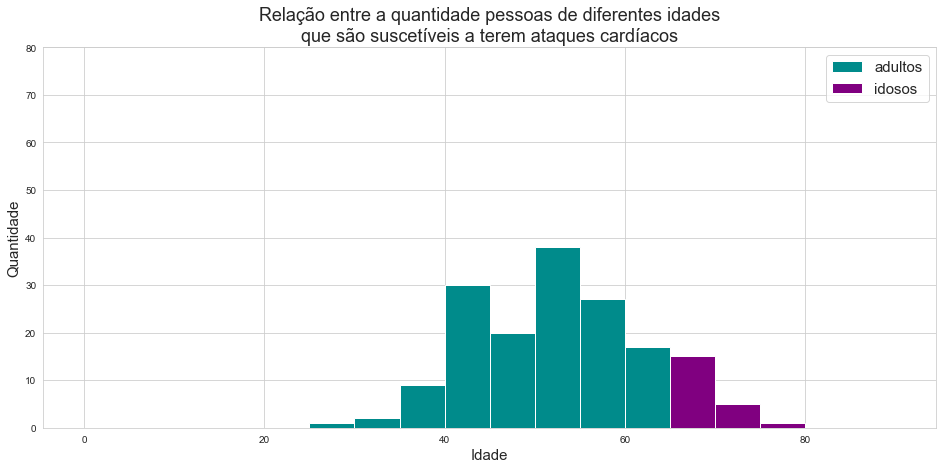

In [126]:
# Relação entre a quantia de pessoas de cada faixa etária que são suscetíveis a ter ataques cardíacos
plt.figure(figsize=(16,7))

plt.hist(crianca_o1, bins=faixa, color='green', edgecolor='white')
plt.hist(adolescente_o1, bins=faixa, color='red', edgecolor='white')
plt.hist(jovem_ad_o1, bins=faixa, color='pink', edgecolor='white')
plt.hist(adulto_o1, bins=faixa, color='darkcyan', edgecolor='white', label='adultos')
plt.hist(idoso_o1, bins=faixa, color='purple', edgecolor='white', label='idosos')
plt.title('Relação entre a quantidade pessoas de diferentes idades\nque são suscetíveis a terem ataques cardíacos', fontsize=18)
plt.legend(fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Idade', fontsize=15)
plt.ylim([0, 80])

plt.show()


In [127]:
# Probabilidade da faixa etária X ter um ataque cardíaco é de:
qtd_ad = len(adulto)
qtd_ad_o1 = len(adulto_o1)

qtd_id = len(idoso)
qtd_id_o1 = len(idoso_o1)

prob_ad_atq = probabilidade(qtd_ad, qtd_ad_o1)
prob_id_atq = probabilidade(qtd_id, qtd_id_o1)


print(f'Probabilidade dos adultos da Database terem um ataque cardíaco é de {prob_ad_atq:.2f}\nProbabilidade dos idosos da Database terem um ataque cardíaco é de {prob_id_atq:.2f}')


Probabilidade dos adultos da Database terem um ataque cardíaco é de 0.55
Probabilidade dos idosos da Database terem um ataque cardíaco é de 0.51


Números que, talvez, não façam muito sentido; uma vez que, o intuitivo, é pensar que os idosos estejam mais suscetíveis a 
ataques cardíacos do que adultos.

### Relação entre os tipos de dores no peito 

Text(0.5, 0, 'Tipo de Dor no Peito')

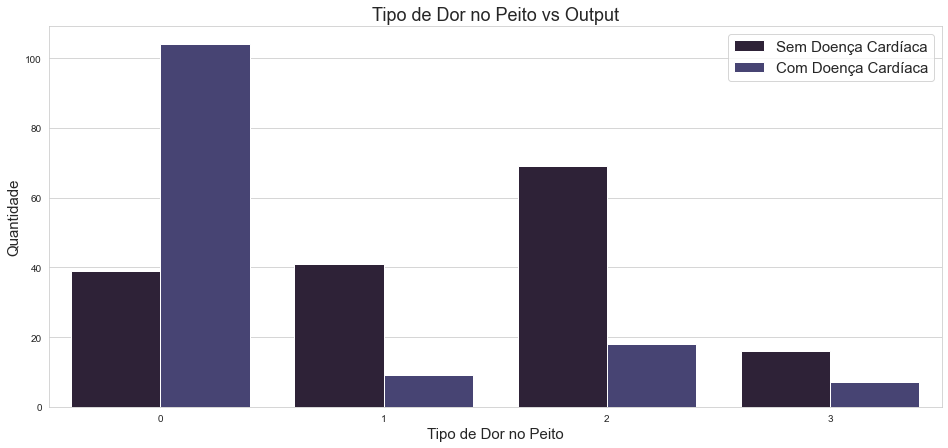

In [128]:
# Gráfico do tipo de dor no peito vs output
plt.figure(figsize=(16,7))
sns.set_style('whitegrid')
sns.set_palette('mako')
sns.countplot(data= dbhm, x='cp',hue='output')
plt.legend(fontsize=15)
plt.title('Tipo de Dor no Peito vs Output', fontsize=18)
plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Tipo de Dor no Peito', fontsize=15)

In [129]:
# Probabilidade dos pacientes da Database que sentirar o tipo de dor X terem um ataque cardíaco é de:
count_cp = db['cp'].value_counts(sort=False)
count_cp_o1 = output1['cp'].value_counts(sort=False)

for x in range(4):
    prob_cp_atq = probabilidade(count_cp[x],count_cp_o1[x])    
    print(f'Probabilidade dos pacientes da Database que sentiram o tipo de dor {x} terem um ataque cardíaco é de {prob_cp_atq:.2f}')


Probabilidade dos pacientes da Database que sentiram o tipo de dor 0 terem um ataque cardíaco é de 0.27
Probabilidade dos pacientes da Database que sentiram o tipo de dor 1 terem um ataque cardíaco é de 0.82
Probabilidade dos pacientes da Database que sentiram o tipo de dor 2 terem um ataque cardíaco é de 0.79
Probabilidade dos pacientes da Database que sentiram o tipo de dor 3 terem um ataque cardíaco é de 0.70


Existem quatro tipos de dor torácica, assintomática, anginosa instável, não anginosa e anginosa estável e, a maioria das pessoas com doenças cardíacas têm dor torácica assintomática. Esse grupo de pessoas, com dor assintomática, pode apresentar sintomas atípicos, como indigestão, gripe ou, até mesmo, músculos do peito tensos. 

Como em qualquer ataque cardíaco, uma convulsão assintomática envolve o fluxo sanguíneo bloqueado para o coração e pode causar danos ao músculo cardíaco. Os fatores de risco para um ataque cardíaco assintomático são os mesmos dos sintomas de doença cardíaca. Esses fatores incluem: 

· Idade da pessoa

· Diabetes

· Se a pessoa estiver acima do peso

· Histórico familiar de doenças cardíacas

· Pressão Alta

· Colesterol Alto

· Sedentarismo

· Se a pessoa já teve um ataque cardíaco anteriormente

· Se a pessoa fuma

Um ataque cardíaco assintomático aumenta o risco de outro ataque cardíaco, que pode ser fatal. Ter outro ataque cardíaco também pode aumentar o risco de complicações, como insuficiência cardíaca. Não há teste para determinar se você corre o risco de ter um ataque cardíaco assintomático. A única maneira de saber se você tem uma convulsão assintomática é usar um eletrocardiograma ou um ecocardiograma. Esses testes podem revelar alterações que predizem um ataque cardíaco.

### Relação entre o paciente ter tido uma angina induzida pelo exercício físico ou não

In [130]:
# Tabelas cruzadas entre a variável 'exng' e a coluna 'output'
print('Tabela cruzada entre a variável exng e os valores da coluna output:')
print(pd.crosstab(db['exng'],db['output']))
print('Tabela cruzada entre a variável exng e os valores da coluna output, já em valor de probabilidade:')
pd.crosstab(db['exng'],db['output'], normalize = True)

Tabela cruzada entre a variável exng e os valores da coluna output:
output   0    1
exng           
0       62  142
1       76   23
Tabela cruzada entre a variável exng e os valores da coluna output, já em valor de probabilidade:


output,0,1
exng,,
0,0.204620,0.468647
1,0.250825,0.075908


### Relação entre as diferentes frequências cardiacas apresentadas pelos pacientes da Database


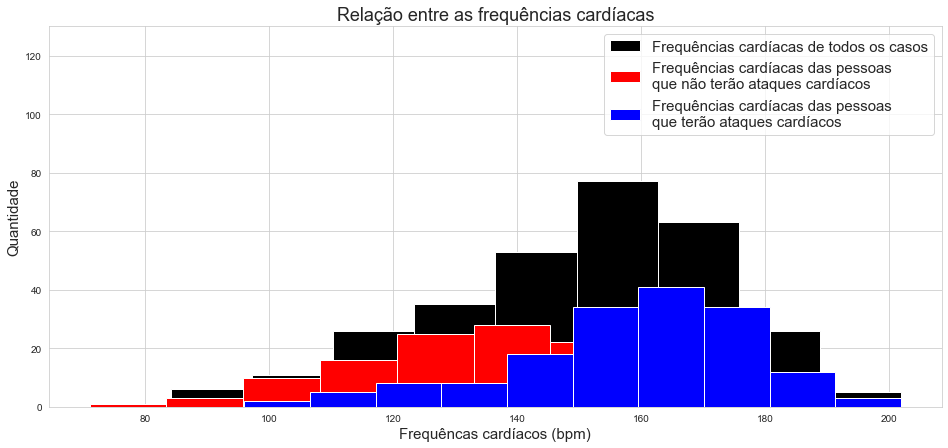

In [131]:
# Gráfico das frequências cardíacas
plt.figure(figsize=(16,7))
thalachh_count = db['thalachh'].value_counts(sort=False)
db['thalachh']
plt.hist(db['thalachh'], color = 'black', label='Frequências cardíacas de todos os casos')
plt.hist(output0['thalachh'], color = 'red', label='Frequências cardíacas das pessoas \nque não terão ataques cardíacos')
plt.hist(output1['thalachh'], color = 'blue', label='Frequências cardíacas das pessoas \nque terão ataques cardíacos')
plt.title('Relação entre as frequências cardíacas', fontsize=18)
plt.legend(fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Frequêncas cardíacos (bpm)', fontsize=15)
plt.ylim(0, 130)
plt.show()


### Relação entre os colesteróis dos pacientes da Database

Text(0.5, 0, 'Colesterol (mg/dL)')

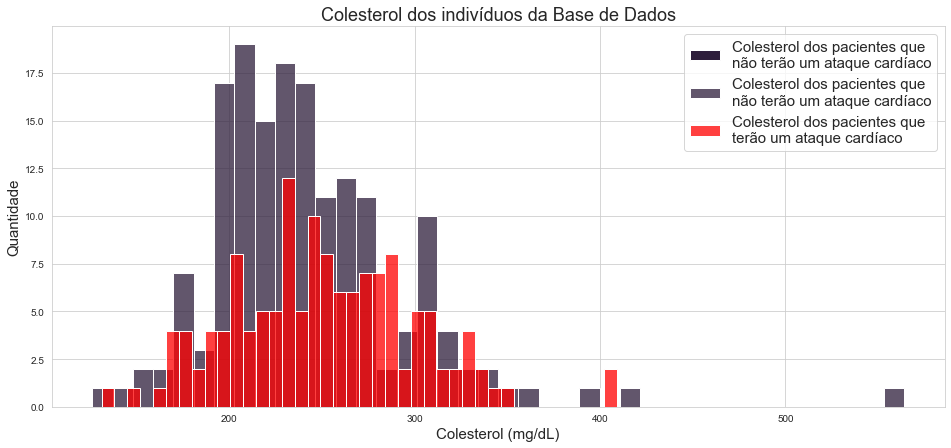

In [132]:
#  Gráfico do colesterol dos indivíduos da Base de Dados
plt.figure(figsize=(16,7))
sns.histplot(db[db['output']==1]['chol'],kde=False,bins=40, label='Colesterol dos pacientes que\nnão terão um ataque cardíaco')
sns.histplot(db[db['output']==0]['chol'],kde=False,bins=40, color = 'red', label='Colesterol dos pacientes que\nterão um ataque cardíaco')
plt.title('Colesterol dos indivíduos da Base de Dados', fontsize=18)
plt.legend(fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Colesterol (mg/dL)', fontsize=15)


O colesterol é um tipo de lipídio produzido por todas as células de vertebrados, presente na membrana celular e cujo nível plasmático elevado está relacionado a doenças cardiovasculares. Existem dois tipos de colesterol, o LDL e o HDL.

· O LDL (Low-Density Lipoprotein), mais conhecido como "colesterol ruim", pode se prender nas paredes das artérias formando placas de gordura. E, com o passar do tempo, essas placas podem dificultar, ou até mesmo, impedir a passagem do fluxo sanguíneo, provocando anginas e/ou infartos. Quanto mais elevados os níveis de LDL, maiores são os risco de desenvolver doenças cardíacas.

· O HDL (High-Density Lipoprotein), mais conhecido como "colesterol bom", auxilia a remover o excesso das placas de gordura formadas pelo LDL. Quanto mais elevados os níveis de HDL, menores são os riscos de desenvolver uma doença cardíaca.

Em adultos, níveis de colesterol total abaixo de 190 miligramas por decilitro (mg/dL) são considerados desejáveis. Intervalos entre 200 a 239 mg/dL e 240 mg/dL e acima são considerados altos. O LDL deve estar abaixo de 100 mg/dL. A proporção de 100 mg/dl é apropriada para pessoas sem problemas de saúde, mas pode ser mais preocupante para pessoas com doenças cardíacas ou fatores de risco para doenças cardíacas. Os valores estão entre 130 e 159 mg/dL e entre 160 e 189 mg/dL. Os níveis de HDL precisam ser mantidos altos. Medidas abaixo de 40 mg/dL são consideradas fatores de risco para doenças cardiovasculares.

Pelo gráfico, podemos notar que a variável 'chol', possivelmente, será descartada nas modelagens, uma vez que o colesterol dos pacientes que terão um ataque cardíaco deveria estar mais à direita e o dos que não terão à esquerda do gráfico, fato que não ocorre para essa base de dados.

### Clustermap das variáveis

Um clustermap é uma ferramenta que nos mostra a correlação numérica entre variáveis.

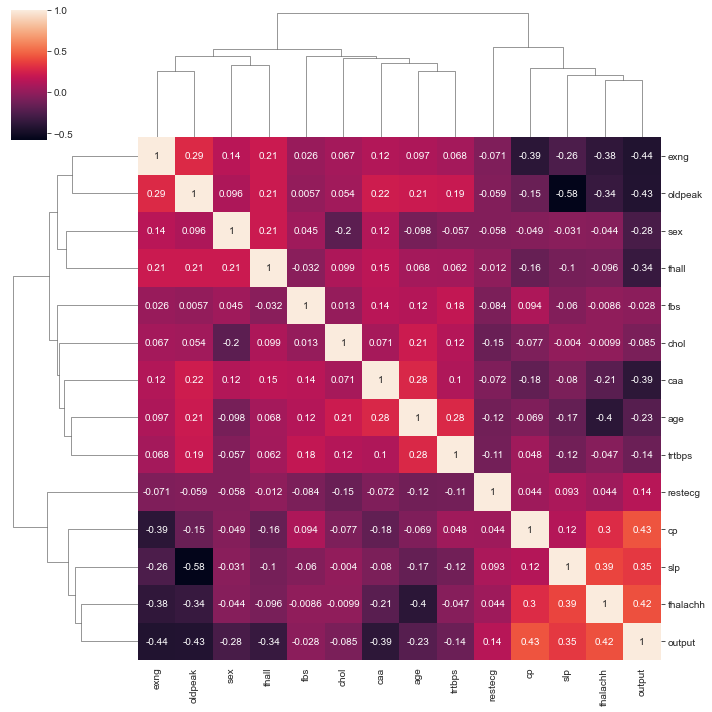

In [133]:
sns.clustermap(db.corr(),annot=True)

### Diagrama de Pares (Pairplot)

No nosso caso, um único gráfico pode não ser o suficiente para visualizar toda a base de dados, e podemos precisar criar vários gráficos simultaneamente.

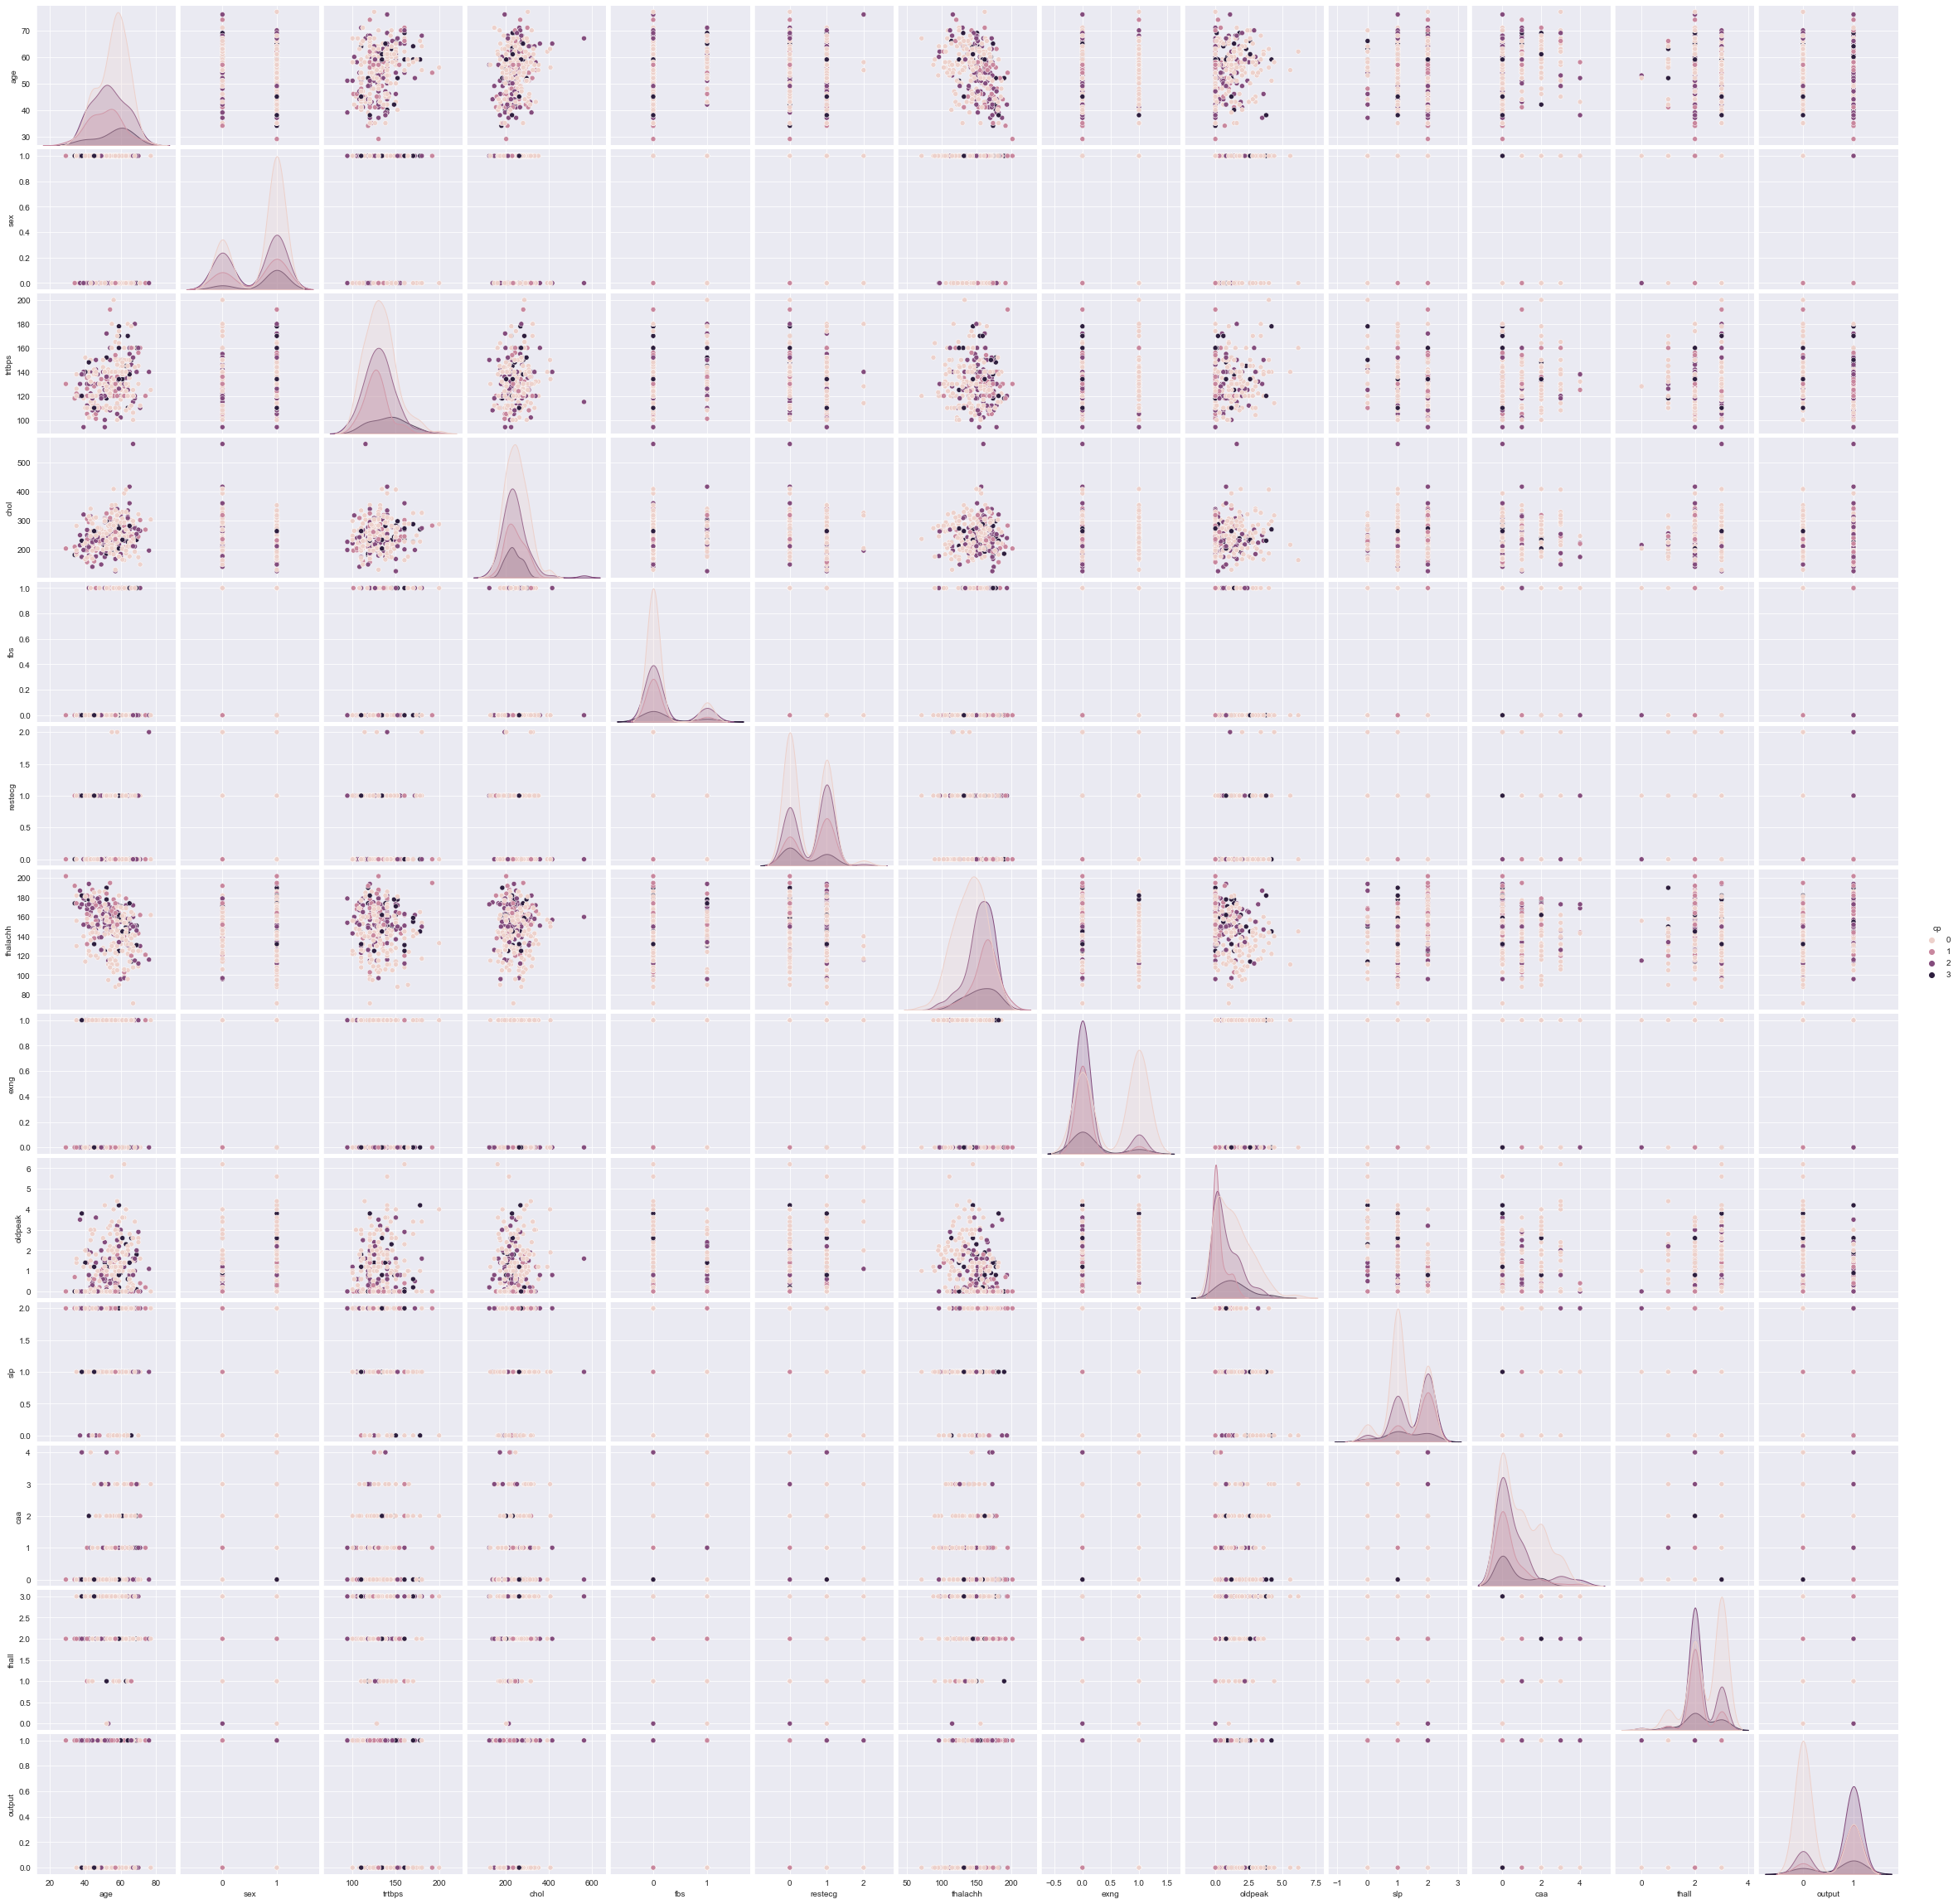

In [134]:
sns.color_palette("Set2")
sns.set_style('darkgrid')
sns.pairplot(db,hue='cp')

# Modelos Classificatórios

Para este projeto, foram escolhidos três modelos classificatórios:

· Regressão Logística

· Random Forest

· Support Vector Machine


<div id='reglog'><div>

## Modelo Classificatório de Regressão Logística

A regressão logística é um modelo estatístico usado para determinar a probabilidade de um evento acontecer. Ela mostra a relação entre os recursos e, em seguida, calcula a probabilidade de um determinado resultado.A regressão logística é utilizado em machine learning para ajudar na criações de previsões precisas, tal método é utilizado quando a variável de destino é binária. Também, essa técnica é altamente manuseada no campo medicinal para prever determinada doença.

<img src="assets/reg_log.png"  style="float: center;padding:2rem;">

### Criando as categorias de treino e de teste

In [135]:
X = db[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak','slp','caa', 'thall']]
Y = db['output']

In [136]:
train, test = train_test_split(db, test_size=0.25,train_size= 0.75, random_state=42)

x_train = train.loc[:,(train.columns != 'output')]
y_train = train['output']


### Método Backwards Stepwise

O método backwards stepwise  remove termos ao modelo com a finalidade de identificar um subconjunto útil dos termos.Este método começa com todos os termos potenciais no modelo e remove o termo menos significativo para cada etapa. Para quando  a variável que não está no modelo têm os valores-p que são menores ou iguais ao valor de Alfa há a remoção de tal variável. Utilizando o backwards stepwise para um modelo saturado, o modelo remove alguns termos com efeito pequeno para obter um número mínimo de graus de liberdade do erro.

Dessa maneira, para a regressão logística utilizaremos do método backwards stepwise para excluir variáveis que não serão necessárias. Logo, iremos adotar um $\alpha$ de 5%.

In [137]:

def regress(Y,X):
    # '''
    # Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    # X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    # '''
    X_cp = sm.add_constant(X)
    model = sm.Logit(Y,X_cp)
    results = model.fit()
    
    return results

results1 = regress(y_train, x_train)
results1.summary()


Optimization terminated successfully.
         Current function value: 0.346372
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                           13
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4972
Time:                        21:53:59   Log-Likelihood:                -78.626
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 1.609e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9176      2.938      0.993      0.321      -2.840       8.676
age           -0.0018      0.026     -0.068      0.946      -0.052       0.049
sex           -1.5612      0.538     -2.901      0.004      -2.616      -0.506
cp             0.9201      0.221      4.164      0.000       0.487       1.353
trtbps        -0.0140      0.012     -1.181      0.238      -0.037       0.009
chol          -0.0025      0.004     -0.610      0.542      -0.011       0.006
fbs            0.0898      0.671      0.134      0.893      -1.225       1.405
restecg        0.8169      0.413      1.978      0.048       0.007       1.627
thalachh       0.0168      0.012      1.351      0.177      -0.008       0.041
exng          -1.1632      0.477     -2.436      0.015      -2.099      -0.227
oldpeak       -0.6552      0.268     -2.442      0.015      -1.181      -0.129
slp            0.7621      0.402      1.894      0.058      -0.026       1.551
caa           -0.8972      0.231     -3.879      0.000      -1.351      -0.444
thall         -1.0827      0.352     -3.078      0.002      -1.772      -0.393
==============================================================================
"""

In [138]:
del x_train['age'] # A coluna age será desconsiderada pois seu valor p é inferior ao alpha adotado

In [139]:
results2 = regress(y_train, x_train)
results2.summary()

Optimization terminated successfully.
         Current function value: 0.346382
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                           12
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4972
Time:                        21:53:59   Log-Likelihood:                -78.629
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 4.358e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8034      2.413      1.162      0.245      -1.926       7.533
sex           -1.5586      0.537     -2.902      0.004      -2.611      -0.506
cp             0.9198      0.221      4.164      0.000       0.487       1.353
trtbps        -0.0142      0.012     -1.217      0.224      -0.037       0.009
chol          -0.0026      0.004     -0.632      0.528      -0.011       0.005
fbs            0.0859      0.668      0.128      0.898      -1.224       1.396
restecg        0.8200      0.411      1.996      0.046       0.015       1.625
thalachh       0.0172      0.011      1.501      0.133      -0.005       0.040
exng          -1.1616      0.477     -2.436      0.015      -2.096      -0.227
oldpeak       -0.6548      0.268     -2.441      0.015      -1.181      -0.129
slp            0.7617      0.402      1.894      0.058      -0.027       1.550
caa           -0.8982      0.231     -3.895      0.000      -1.350      -0.446
thall         -1.0838      0.352     -3.083      0.002      -1.773      -0.395
==============================================================================
"""

In [140]:
del x_train['fbs'] # A coluna fbs será desconsiderada pois seu valor p é inferior ao alpha adotado

In [141]:
results3 = regress(y_train, x_train)
results3.summary()

Optimization terminated successfully.
         Current function value: 0.346418
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      215
Method:                           MLE   Df Model:                           11
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4971
Time:                        21:53:59   Log-Likelihood:                -78.637
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 1.134e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7963      2.412      1.160      0.246      -1.930       7.523
sex           -1.5482      0.531     -2.917      0.004      -2.588      -0.508
cp             0.9264      0.215      4.302      0.000       0.504       1.348
trtbps        -0.0139      0.011     -1.217      0.224      -0.036       0.008
chol          -0.0025      0.004     -0.622      0.534      -0.010       0.005
restecg        0.8211      0.411      1.999      0.046       0.016       1.626
thalachh       0.0171      0.011      1.496      0.135      -0.005       0.039
exng          -1.1636      0.477     -2.440      0.015      -2.098      -0.229
oldpeak       -0.6615      0.263     -2.511      0.012      -1.178      -0.145
slp            0.7493      0.390      1.922      0.055      -0.015       1.513
caa           -0.8948      0.229     -3.907      0.000      -1.344      -0.446
thall         -1.0906      0.348     -3.138      0.002      -1.772      -0.409
==============================================================================
"""

In [142]:
del x_train['chol'] # A coluna chol será desconsiderada pois seu valor p é inferior ao alpha adotado

In [143]:
results4 = regress(y_train, x_train)
results4.summary()

Optimization terminated successfully.
         Current function value: 0.347253
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      216
Method:                           MLE   Df Model:                           10
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4959
Time:                        21:53:59   Log-Likelihood:                -78.826
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 3.336e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3393      2.282      1.025      0.305      -2.134       6.812
sex           -1.4482      0.500     -2.895      0.004      -2.428      -0.468
cp             0.9336      0.215      4.339      0.000       0.512       1.355
trtbps        -0.0143      0.011     -1.256      0.209      -0.037       0.008
restecg        0.8585      0.405      2.118      0.034       0.064       1.653
thalachh       0.0162      0.011      1.439      0.150      -0.006       0.038
exng          -1.1658      0.475     -2.455      0.014      -2.097      -0.235
oldpeak       -0.6849      0.261     -2.626      0.009      -1.196      -0.174
slp            0.7352      0.389      1.889      0.059      -0.028       1.498
caa           -0.8828      0.227     -3.896      0.000      -1.327      -0.439
thall         -1.1081      0.347     -3.197      0.001      -1.787      -0.429
==============================================================================
"""

In [144]:
del x_train['trtbps'] # A coluna trtbps será desconsiderada pois seu valor p é inferior ao alpha adotado

In [145]:
results5 = regress(y_train,x_train)
results5.summary()

Optimization terminated successfully.
         Current function value: 0.350790
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      217
Method:                           MLE   Df Model:                            9
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4908
Time:                        21:53:59   Log-Likelihood:                -79.629
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 1.672e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7530      1.866      0.404      0.687      -2.905       4.411
sex           -1.3629      0.488     -2.794      0.005      -2.319      -0.407
cp             0.9140      0.214      4.278      0.000       0.495       1.333
restecg        0.8704      0.400      2.175      0.030       0.086       1.655
thalachh       0.0144      0.011      1.311      0.190      -0.007       0.036
exng          -1.2181      0.469     -2.600      0.009      -2.136      -0.300
oldpeak       -0.7108      0.259     -2.740      0.006      -1.219      -0.202
slp            0.6974      0.387      1.803      0.071      -0.061       1.455
caa           -0.8907      0.225     -3.953      0.000      -1.332      -0.449
thall         -1.0839      0.342     -3.170      0.002      -1.754      -0.414
==============================================================================
"""

In [146]:
del x_train['thalachh'] # A coluna thalachh será desconsiderada pois seu valor p é inferior ao alpha adotado

In [147]:
results6 = regress(y_train,x_train)
results6.summary()

Optimization terminated successfully.
         Current function value: 0.354629
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                            8
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4852
Time:                        21:53:59   Log-Likelihood:                -80.501
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 8.493e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7884      1.071      2.604      0.009       0.690       4.887
sex           -1.2494      0.473     -2.639      0.008      -2.177      -0.321
cp             0.9623      0.212      4.542      0.000       0.547       1.378
restecg        0.8921      0.399      2.237      0.025       0.111       1.674
exng          -1.3900      0.452     -3.073      0.002      -2.276      -0.504
oldpeak       -0.7630      0.260     -2.938      0.003      -1.272      -0.254
slp            0.7478      0.380      1.968      0.049       0.003       1.493
caa           -0.9382      0.221     -4.244      0.000      -1.371      -0.505
thall         -1.0566      0.340     -3.110      0.002      -1.722      -0.391
==============================================================================
"""

In [148]:
y_test = test.loc[:,'output']
x_test = test.loc[:,x_train.columns]
x_test_constante =sm.add_constant(x_test) 
x_test

,sex,cp,restecg,exng,oldpeak,slp,caa,thall
179,1,0,0,1,0.6,1,1,1
228,1,3,0,0,0.2,1,0,3
111,1,2,1,0,0.2,2,1,3
246,0,0,0,1,1.9,1,2,3
60,0,2,0,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...
22,1,0,1,0,0.0,2,0,2
258,0,0,1,1,1.4,1,0,2
56,1,0,0,0,0.0,2,0,2
242,1,0,0,0,2.0,1,2,1


In [149]:
y_predicted = results6.predict(x_test_constante)
y_predicted

179    0.174254
228    0.864287
111    0.830714
246    0.012746
60     0.959194
         ...   
22     0.859775
258    0.464275
56     0.715316
242    0.102270
114    0.941352
Length: 76, dtype: float64

In [150]:
x_test['output previsto']= 0
i = 0
while i < len(y_predicted):
    if i > 0.5:
        x_test.loc[i,'output previsto'] = 1
    else: 
        x_test.loc[i,'output previsto'] = 0
    i+=1
x_test['output real'] = y_test
x_test

pd.crosstab(x_test['output real'], x_test['output previsto'])

prob_0 = pd.crosstab(x_test['output real'], x_test['output previsto'],normalize=True)[0][0]
prob_1 = pd.crosstab(x_test['output real'], x_test['output previsto'],normalize=True)[1][1]
acuracia = (prob_0 + prob_1)*100

print(f'A acurácia do classificador de regressão logística é de {acuracia:.2f}%')


A acurácia do classificador de regressão logística é de 72.37%


### Curva ROC
A curva ROC (Receiver Operator Character) é uma métrica de avaliação para problemas de classificação binária. Esta é uma curva de probabilidade que traça a Taxa de Verdeiros Positivos versus Taxa de Falsos Positivos em diferentes limiares, basicamente separando "sinal" de "ruído". A AUC (Area Under the Curve) é uma medida da capacidade do classificador de distinguir entre as classes e é usada como um resumo da curva ROC. Quanto maior a AUC, melhor o desempenho do modelo na distinção entre as classes positivas e negativas.

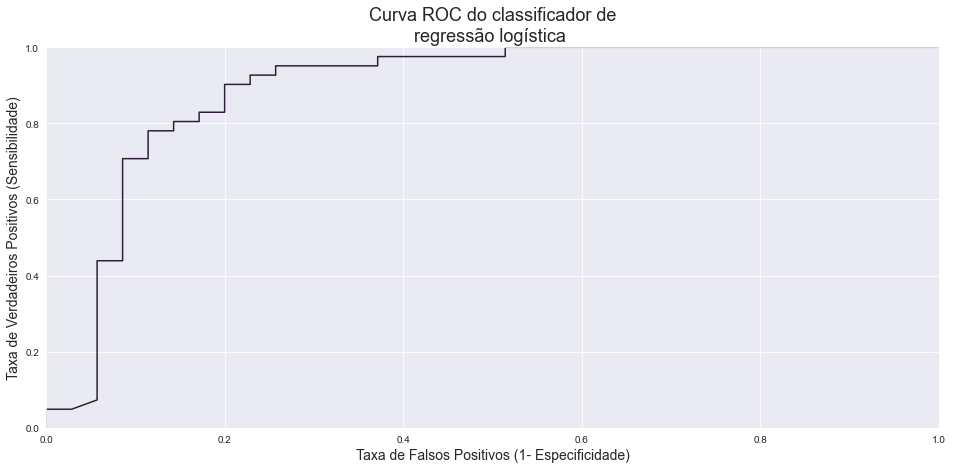

In [151]:
plt.figure(figsize=(16,7))
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
plt.plot(fpr,tpr)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Curva ROC do classificador de\nregressão logística ', fontsize=18)
plt.xlabel('Taxa de Falsos Positivos (1- Especificidade)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=14)
plt.grid(True)

# Sensibilidade = capacidade de detectar algum evento na amostra.
# Especificidade = capacidade de detectar verdadeiros eventos na amostra.

In [152]:
y = x_test['output previsto']
v = x_test['output real']
score_roc = metrics.roc_auc_score(y_test, y_predicted)
print(f'A área sob a curva ROC para o modelo de regressão logística é de {score_roc:.2f}')

A área sob a curva ROC para o modelo de regressão logística é de 0.89


### Conclusão do Modelo Classificatório de Regressão Logística

Podemos concluir que a área sob a curva ROC é de 0.89, o que é um resultado bem satisfatório. Além disso, este modelo teve uma acurácia de 72.37%, um valor que também é satisfatório.

<div id='rf_clf'><div>

## Modelo Classificatório de Random Forest
O modelo de Random Forrest gera várias árvores de decisão (de forma aleatória) e as combina de tal forma que gere o melhor resultado das suas predições, ou seja, com maior acurácia. Apesar de estarmos utilizando a floresta aleatória em uma tarefa de classificação, ela pode também ser utilizada em tarefas de regressão (quando o target é quantitativo e não qualitativo). As florestas aleatórias, aplicadas para classificação, são um dos pilares do ML, é muito versátil e muito poderoso. Acompanhe um exemplo de figura que mostra uma floresta aleatória: 
<img src="assets/random_forest.png"  style="float: center;padding:2rem;">

In [153]:
# Realizando a separação de X e Y para realizar o split
X = db[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak','slp','caa', 'thall']]
Y = db['output']

### Método Split

O método "split" é utilizado para dividir o conjunto de dados em duas partes distintas: treinamento (train) e teste (test). Essa divisão é feita com base em uma proporção pré-definida, no caso de 80% para treinamento e 20% para teste.

Ao aplicar o método "split", a base de dados é separada em duas partes independentes. A parte de treinamento é utilizada para ajustar o modelo aos dados, permitindo que ele aprenda e se adapte aos padrões presentes nos dados de treinamento. A parte de teste, por sua vez, é utilizada para avaliar o desempenho do modelo em dados não vistos anteriormente, verificando sua capacidade de generalização e sua eficácia na previsão de novos exemplos.

Essa divisão estratégica entre dados de treinamento e teste é fundamental para a avaliação adequada do modelo e a obtenção de métricas confiáveis de desempenho. Ela permite verificar se o modelo é capaz de generalizar corretamente, evitando o sobreajuste aos dados de treinamento e auxiliando na identificação de possíveis problemas, como subajuste ou superajuste.

Em resumo, o método "split" divide a base de dados em conjuntos de treinamento e teste, estabelecendo uma proporção para cada um, de modo a possibilitar a avaliação e validação do modelo de forma adequada.

In [154]:
#Aplição do metodo Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=111)

In [155]:
#Aplicação do Random Forrest
from sklearn.ensemble import RandomForestClassifier

rf_heartatack = RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

rf_heartatack.fit(X_train, Y_train)

y_pred_rf = rf_heartatack.predict(X_test)

y_pred_rf

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [156]:
#print('Acuracia :', {accuracy_score) (y_test, y_pred_rf)*100})
acuracia= accuracy_score (y_pred_rf, Y_test)*100
print(f'A acuracia do modelo é de {acuracia:.2f}%')

A acuracia do modelo é de 85.25%


### Testando o modelo por influência

Para realizar o teste de influência do modelo, conduzimos uma análise baseada no perfil de uma pessoa considerada saudável e outra considerada não saudável, utilizando as variáveis disponíveis em nosso conjunto de dados. Aplicamos esses valores ao modelo e observamos a classificação resultante, que varia entre 0 e 1.

In [157]:
# Validação cruzada do metodo Random Forrest
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
print('-------------Validação Cruzada------------')
for metrica in scoring_metrics:
    # Método K-fold de validação cruzada
    print('')
    print(f'--------------------Métrica usada: {metrica}--------------------')
    lista_de_acuracia_treino = cross_val_score(rf_heartatack, X, Y, cv=4, scoring=metrica)
    df_acuracia_treino = pd.DataFrame(lista_de_acuracia_treino)
    media_kfold_treino = df_acuracia_treino[0].mean()
    std_kfold_treino = df_acuracia_treino[0].std()
    print(f"Resultados obtidos {lista_de_acuracia_treino}")
    print(f"Scores: {media_kfold_treino}")
    print(f"O desvio padrão: {std_kfold_treino}")
    print('')

-------------Validação Cruzada------------

--------------------Métrica usada: accuracy--------------------
Resultados obtidos [0.85526316 0.92105263 0.78947368 0.77333333]
Scores: 0.834780701754386
O desvio padrão: 0.06755462434155939


--------------------Métrica usada: f1_micro--------------------
Resultados obtidos [0.85526316 0.92105263 0.78947368 0.77333333]
Scores: 0.834780701754386
O desvio padrão: 0.06755462434155939


--------------------Métrica usada: f1_macro--------------------
Resultados obtidos [0.85090066 0.92055749 0.78932779 0.76252561]
Scores: 0.8308278876224122
O desvio padrão: 0.07033675485321599


--------------------Métrica usada: f1_weighted--------------------
Resultados obtidos [0.85358527 0.92105263 0.78976547 0.76725399]
Scores: 0.832914342137598
O desvio padrão: 0.06920682118626295



In [158]:
meu_x = [[40, 0, 3, 126, 126, 0, 0, 100, 1, 0.4, 0, 2, 3]]
boa= rf_heartatack.predict(meu_x)
print(boa)

meu_x_ruim=[[40,0,3,150,140,1,2,130,0,3,5,2,0,]]
ruim= rf_heartatack.predict(meu_x_ruim)

print(f'O modelo classificou a pessoa dita com saudável como: {boa[0]}\nO modelo classificou a pessoa dita como não saudável como: {ruim[0]}')

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0]


C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


O modelo classificou a pessoa dita com saudável como: 0
O modelo classificou a pessoa dita como não saudável como: 1


### Conclusão do Random Forrest

Com base na análise realizada, pode-se concluir que o modelo apresenta uma acurácia de aproximadamente 85,25%. Além disso, após realizar a validação cruzada, observou-se que a média dos scores está próxima ao valor previsto pelo modelo. É importante destacar que o desvio padrão é baixo, indicando uma margem de erro reduzida em relação à eficácia do modelo.

Além disso, realizamos um teste induzido no qual o modelo analisou dados de indivíduos considerados saudáveis (target 0) e dados de indivíduos considerados não saudáveis (target 1). O modelo obteve excelentes resultados ao classificar corretamente cada indivíduo de acordo com a categoria esperada.

## SVM Classifier- Support vector machines

Uma máquina de vetores de suporte é um conceito para metodos de analise de dados. Esses dados reconhecem padrões, ele é muito usado para classifição e pode ser usado para regressão tambem. O SVM padrão, recebe com entrada um conjunto de dados e consegue predizer, para cada um deles, qual a sua classifição entre dois targets.
<img src="assets/svm.png"  style="float: center;padding:2rem;">

In [159]:
clf = svm.SVC (gamma='auto' )

In [160]:
treino= clf.fit(X_train,Y_train)

In [161]:
acuracia2= clf.score(X_test,Y_test)*100
print(f'A acuracia do modelo é de {acuracia2:.2f}%')

A acuracia do modelo é de 63.93%


### Validação cruzada do SVM-Support vector machines (K-Fold)

Pode-se observar que o modelo alcança uma acurácia significativa, embora não seja tão alta quanto o modelo Random Forest. Isso ocorre porque utilizamos o modelo padrão do SVM. Ao realizar a validação cruzada, notamos que o modelo apresenta uma média de acurácia bastante consistente e um desvio padrão bastante baixo. No entanto, é importante ressaltar que a acurácia média fica em torno de 63%.

In [162]:
# Validação cruzada do metodo SVM
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
for metrica in scoring_metrics:
    # Método K-fold de validação cruzada
    print('-------------Validação Cruzada------------')
    print('')
    print(f'--------------------Métrica usada: {metrica}--------------------')
    lista_de_acuracia_treino2 = cross_val_score(treino, X, Y, cv=4, scoring=metrica)
    df_acuracia_treino2 = pd.DataFrame(lista_de_acuracia_treino2)
    media_kfold_treino2 = df_acuracia_treino2[0].mean()
    std_kfold_treino2 = df_acuracia_treino2[0].std()
    print(f"Resultados obtidos {lista_de_acuracia_treino2}")
    print(f"Scores: {media_kfold_treino2}")
    print(f"O desvio padrão: {std_kfold_treino2}")
    print('')

-------------Validação Cruzada------------

--------------------Métrica usada: accuracy--------------------
Resultados obtidos [0.55263158 0.53947368 0.53947368 0.54666667]
Scores: 0.5445614035087719
O desvio padrão: 0.0063594978808392605

-------------Validação Cruzada------------

--------------------Métrica usada: f1_micro--------------------
Resultados obtidos [0.55263158 0.53947368 0.53947368 0.54666667]
Scores: 0.5445614035087719
O desvio padrão: 0.0063594978808392605

-------------Validação Cruzada------------

--------------------Métrica usada: f1_macro--------------------
Resultados obtidos [0.3559322  0.35042735 0.35042735 0.35344828]
Scores: 0.3525587950266501
O desvio padrão: 0.0026619023461376965

-------------Validação Cruzada------------

--------------------Métrica usada: f1_weighted--------------------
Resultados obtidos [0.39339875 0.37809267 0.37809267 0.38643678]
Scores: 0.3840052169642437
O desvio padrão: 0.007395211766867635



# Conclusão Geral

Ao analisar os resultados obtidos com relação ao objetivo estabelecido, concluímos que os métodos classificatórios mais eficazes para a nossa base de dados são a Regressão Logística e o Random Forest. Esses modelos apresentaram acurácias de 72.37% e 85.25%, respectivamente.

A Regressão Logística demonstrou um desempenho sólido na tarefa de prever a suscetibilidade de um paciente a um ataque cardíaco, fornecendo resultados consistentes e confiáveis. Por outro lado, o Random Forest se destacou como um modelo de alto desempenho, alcançando uma acurácia significativamente maior.

Esses resultados são promissores e sugerem que esses métodos classificatórios têm potencial para auxiliar na identificação precoce de indivíduos com maior risco de desenvolver um ataque cardíaco. No entanto, é importante destacar que a escolha do modelo mais adequado dependerá das características específicas da base de dados, bem como de outros critérios relevantes para o contexto clínico.

Esses achados proporcionam insights valiosos para futuras pesquisas e aplicações clínicas na área da cardiologia, fornecendo uma base sólida para o desenvolvimento de abordagens mais precisas e efetivas na previsão da suscetibilidade a ataques cardíacos.

# Referências

https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/doe/how-to/factorial/analyze-variability/perform-the-analysis/perform-stepwise-regression/#:~:text=Elimina%C3%A7%C3%A3o%20backward%3A%20Este%20m%C3%A9todo%20come%C3%A7a,de%20Alfa%20para%20remo%C3%A7%C3%A3o%20especificado

https://www.tibco.com/pt-br/reference-center/what-is-logistic-regression#:~:text=A%20regress%C3%A3o%20log%C3%ADstica%20%C3%A9%20um,ajudar%20a%20criar%20previs%C3%B5es%20precisas

https://www.sanarmed.com/curva-roc-isso-realmente-faz-diferenca-colunistas

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=The%20Area%20Under%20the%20Curve,the%20positive%20and%20negative%20classes

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download